In [12]:
import psycopg2
import os
# Connect to the database

print(os.environ.get('DBNAME'))
print(os.environ.get('DBUSER'))
print(os.environ.get('DBPASS'))
print(os.environ.get('DBHOST'))
print(os.environ.get('DBPORT'))

# Use environment variables to connect to the database

# TODO create a read-only user for the database
conn = psycopg2.connect(dbname=os.environ.get('DBNAME'), user=os.environ.get('DBUSER'), password=os.environ.get('DBPASS'), host=os.environ.get('DBHOST'), port=os.environ.get('DBPORT'))

# Create a cursor to perform database operations
cur = conn.cursor()

# Print PostgreSQL version
cur.execute("SELECT version();")
print(cur.fetchone())

# Print All the Table Names
cur.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
print(cur.fetchall())

import pandas as pd

# Read the data from the DB
df = pd.read_sql_query("""SELECT * FROM public."targetranges" """, conn)
df.head()





postgres
admin
LocalPasswordOnly
localhost
5432
('PostgreSQL 16.0 (Debian 16.0-1.pgdg120+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)
[('restaurants',), ('targetranges',), ('depositrates',), ('targetrates',)]


/tmp/ipykernel_37282/3175341415.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""SELECT * FROM public."targetranges" """, conn)


,id,date,lower_bound,upper_bound
0,1,2000-01-03,1.25,2.25
1,2,2000-01-04,1.25,2.25
2,3,2000-01-05,1.25,2.25
3,4,2000-01-06,1.25,2.25
4,5,2000-01-07,1.25,2.25


<Axes: xlabel='date'>

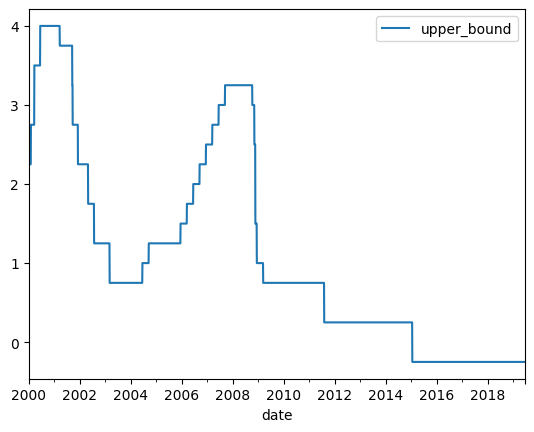

In [16]:
df.head()
# Plot the Data using Pandas
df.plot(x='date', y='upper_bound')